In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv("monthly_milk_production.csv",index_col="Date",parse_dates=True)
#to conver date original format 

In [44]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [45]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


<Axes: xlabel='Date'>

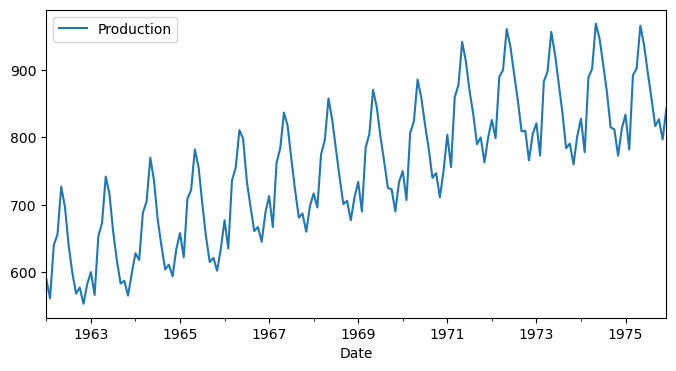

In [47]:
df.plot(figsize=(8,4))

In [48]:
len(df)

168

In [49]:
train=df.iloc[:158]
test=df.iloc[158:]

In [50]:
test

,Production
Date,
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797


In [51]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()
scaled_train=scalar.fit_transform(train)
scaled_test=scalar.fit_transform(test)

In [52]:
scaled_train[-12:]

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [53]:
scaled_test

array([[0.56213018],
       [0.62721893],
       [1.        ],
       [0.82840237],
       [0.58579882],
       [0.36094675],
       [0.1183432 ],
       [0.17751479],
       [0.        ],
       [0.27218935]])

In [54]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [55]:
n_input= 3
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

##### scaled_train:this is likely your training data that has been preprocessed or scaled for training purposes,it typically contains time series or sequential data.
##### scaled_train:target data length,n_input:this parameter specifies the length of the sequences that the generator will generate for training,n_input likely rep the o of time steps to be used as input to predict the next time step,for instance if n_iput is set to 10 ,the generator will generator will create sequence of length 10.batch_size=1:no of batches

In [56]:
x,y = generator[1] # call generator here and 3 is index that have value from index 3 to 5 andtaget is 6
print(f'Given the array:{x.flatten()}')
print(f'predict this y: {y}')


Given the array:[0.01923077 0.20913462 0.24759615]
predict this y: [[0.41826923]]


In [57]:
x.shape   # batch size=1,raws=3,col=1

(1, 3, 1)

In [58]:
n_inputs =12
n_features=1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)

In [59]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [60]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_inputs,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

C:\Users\YOGA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###### The LSTM is a type of recurrent neural network layer(RNN)designed to process and learn from sequential data. The LSTM layer process the input sequence one step a a time maintaining  an internal  state that capture information from 
previous time steps.###### 

100 Specifies the number of neurons or units in the  TM

layer.Each unit represents a memory cell that tore

information across ti  steps

input_shape=(n_inputs,n_features)--Defines the sh e of the

input data expected by the TM layer

n_

In [61]:
model.fit(generator,epochs=50,batch_size=1)

Epoch 1/50
 19/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2764 

C:\Users\YOGA\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0976
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0216
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0177
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0060
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044
Epoch 13/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033
Epoch 14/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033
Epoch 15/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033


In [62]:
model.history

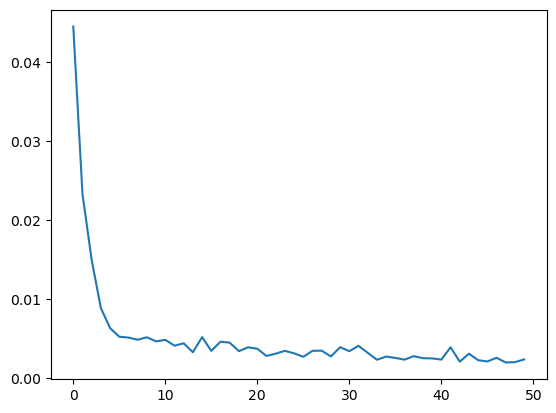

In [63]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [64]:
last_train_batch=scaled_train[-12:]

#### scaled_train[-12:]:the slice operation extracts the last 12 elements from the scaled train array or list. print(last_train_batch):This prints the extracted batch to verify its contents.

In [65]:
last_train_batch.shape

(12, 1)

In [66]:
last_train_batch

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [67]:
last_train_batch=last_train_batch.reshape(1,n_inputs,n_features)

In [68]:
last_train_batch.shape

(1, 12, 1)

In [69]:
pred=model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


In [70]:
pred#we will get 13 th prediction

array([[0.81652117]], dtype=float32)